#Goodness of Fit Testing for Synthetic Data

Author: dp1618


In [9]:
import os
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


#Binomial
generate a series of binomial distributions with increasing mean (n*p) and run KS KL and anderson darling tests.
Null Hypothesis KS Test: The data follows the specified distribution (the binomial follows the normal distribution).
Null Hypothesis Anderson-Darling Test: The data follows the specified distribution (the binomial follows the normal distribution).
Null Hypothesis for KL Test: One data set follows another specified distribution (the binomial follows the normal distribution).

In [10]:
#create an array of increasing n values
narray = range(1,100,1)
#make an array of zeros to stor the specified statistic value for each n in narray
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
#set the s and the p for the binomial distributions
s = 100
p = .5 #np.random.random_sample()
#print p

#create the distributions and 
for i,n in enumerate(narray):
    distb = np.random.binomial(n, p, 100)
    #print scipy.stats.kstest(distb, 'norm')
    ks_b[i] = scipy.stats.kstest(distb,'norm')[0]
    ad_b[i] = scipy.stats.anderson(distb,'norm')[0]
    #make bins and bin centers for the normal distribution for the KL/Entropy test
    mybins=np.linspace(min(distb),max(distb), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
    kl_b[i] = scipy.stats.entropy((np.histogram(distb, bins=mybins)[0]), scipy.stats.norm.pdf(bincenters)+n)
print "KS Test Statistics: \n",  ks_b
print "Anderson Test Statistics:\n",  ad_b
print "KL Test Statistics:\n", kl_b

KS Test Statistics: 
[ 0.5         0.62134475  0.71134475  0.75134475  0.82134475  0.87724987
  0.92724987  0.97724987  0.96724987  0.9686501   0.9886501   0.9886501
  0.9886501   0.9686501   0.9886501   0.9986501   0.9886501   0.9986501
  0.99999971  0.99999971  0.99996833  0.99999971  0.9986501   1.
  0.99999971  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.

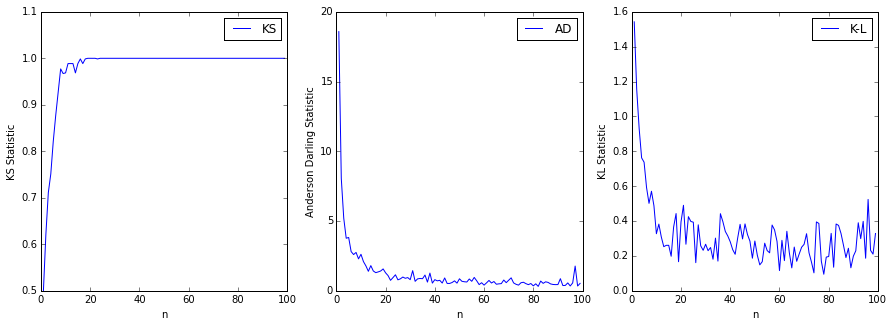

In [11]:
#PLOT the different statistics vs n 
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.ylabel('KS Statistic')
pl.xlabel('n')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.ylabel('Anderson Darling Statistic')
pl.xlabel('n')
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L')
pl.ylabel('KL Statistic')
pl.xlabel('n')
pl.legend()

#Comment on the KS Test:
For the KS test, as the test statistic decreases the function is more likely to be close to the distribution we are comparing it to.  In this case as n increases, the test statistic increases and we can reject the null hypothesis.

#Comment on the Anderson Test:
For the anderson-darling test as the test statistic decreases the function is more likely to be close to the distribution we are comparing it to.  In this case as n increases, the test statistic decreases and the binomial function is closer to normal. Because as n increases the binomial converges to the normal distribution this makes sense. 

#Comment on the KL Test:
The Kullback Liebler Test indicates the information lost when one distribution is modelled as another.  As the Kullback Liebler test statistic decreases the function we are comparing to the specified distribution is more likely to be that distribution.  In this case as n increases, the test statistic decreases to a point and then hovers around that point.  This appears to indicate that the binomial distribution is close to normal (but not normally distributed for large n). 

#Poisson
generate a series of poisson distributions with increasing mean and run KS KL and anderson darling tests.
Null Hypothesis KS Test: The data follows the specified distribution (the binomial follows the normal distribution).
Null Hypothesis Anderson-Darling Test: The data follows the specified distribution (the binomial follows the normal distribution).
Null Hypothesis for KL Test: One data set follows another specified distribution (the binomial follows the normal distribution).

In [12]:
#create an array of increasing lambda values
lambdaarray = range(1,100,1)
#make an array of zeros to store the specified statistic value for each lambda in narray
ks_p = np.zeros(len(narray))
ad_p = np.zeros(len(narray))
kl_p = np.zeros(len(narray))
#set the size for the poisson distributions
s = 100

#create the distributions and load them into the arrays
for i,n in enumerate(lambdaarray):
    distp = np.random.poisson(n, 100)
    ks_p[i] = scipy.stats.kstest(distp,'norm')[0]
    ad_p[i] = scipy.stats.anderson(distp,'norm')[0]
    #make bins and bin centers for the normal distribution for the KL/Entropy test
    mybins=np.linspace(min(distp),max(distp), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
    kl_p[i] = scipy.stats.entropy((np.histogram(distp, bins=mybins)[0]), scipy.stats.norm.pdf(bincenters)+n)
print "KS Test Statistics: \n",  ks_b
print "Anderson Test Statistics:\n",  ad_b
print "KL Test Statistics:\n", kl_b

KS Test Statistics: 
[ 0.5         0.62134475  0.71134475  0.75134475  0.82134475  0.87724987
  0.92724987  0.97724987  0.96724987  0.9686501   0.9886501   0.9886501
  0.9886501   0.9686501   0.9886501   0.9986501   0.9886501   0.9986501
  0.99999971  0.99999971  0.99996833  0.99999971  0.9986501   1.
  0.99999971  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.

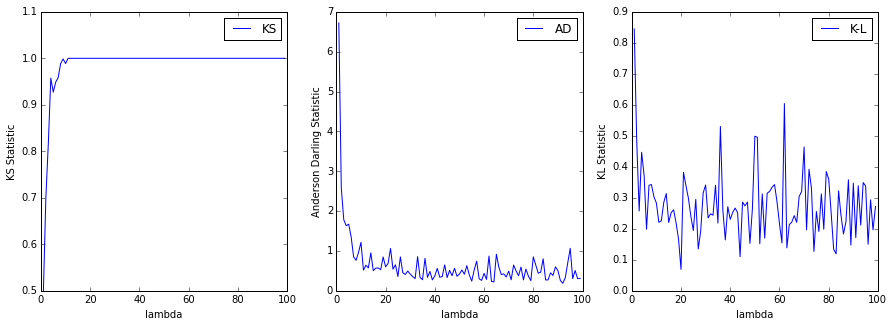

In [13]:
#PLOT the different statistics vs n 
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(lambdaarray, ks_p, label='KS')
pl.ylabel('KS Statistic')
pl.xlabel('lambda')
pl.legend()

fig.add_subplot(132)
pl.plot(lambdaarray, ad_p,  label='AD')
pl.ylabel('Anderson Darling Statistic')
pl.xlabel('lambda')
pl.legend()

fig.add_subplot(133)
pl.plot(lambdaarray, kl_p, label='K-L')
pl.ylabel('KL Statistic')
pl.xlabel('lambda')
pl.legend()

#Comment on the KS Test:
For the KS test, as the test statistic decreases the function is more likely to be close to the distribution we are comparing it to.  In this case as lambda increases, the test statistic increases and the poisson function is less likely to be normal. This is the inverse of what is expected and indicated by the other two tests. 

#Comment on the Anderson Test:
For the anderson-darling test as the test statistic decreases the function is more likely to be close to the distribution we are comparing it to.  In this case as lambda increases, the test statistic decreases and the poisson function is closer to normal. Because as n increases the poisson converges to the normal distribution this makes sense. 

#Comment on the KL Test:
The Kullback Liebler Test indicates the information lost when one distribution is modelled as another.  As the Kullback Liebler test statistic decreases the function we are comparing to the specified distribution is more likely to be that distribution.  In this case as lambda increases, the test statistic decreases to a point and then hovers around that point.  This appears to indicate that the poisson distribution is close to normal (but not normally distributed for large n). 